In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.dates as mdates
import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import matplotlib.pyplot as plt
import numpy as np
color = sns.color_palette()
sns.set_style('darkgrid')
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import matplotlib.pyplot as plt
import numpy as np
color = sns.color_palette()
sns.set_style('darkgrid')

def getPctMissing(series):
    num = series.isnull().sum()
    den = series.count()
    return 100 * (num / den)


def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
            columns={0: 'missing_values', 1: 'missing_percent'})
    return mis_val_table_ren_columns

input_path = "/Users/dongjian/data/"
def safe_float(x):
    try :
        return float(x.strip())
    except:
        print x ,"????"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
class tick_tock:
    def __init__(self, process_name, verbose=1):
        self.process_name = process_name
        self.verbose = verbose

    def __enter__(self):
        if self.verbose:
            print(self.process_name + " begin ......")
            self.begin_time = time.time()

    def __exit__(self, type, value, traceback):
        if self.verbose:
            end_time = time.time()
            print(self.process_name + " end ......")
            print('time lapsing {0} s \n'.format(end_time - self.begin_time))
def ka_add_groupby_features_1_vs_n(df, group_columns_list, agg_dict, only_new_feature=True):
    '''Create statistical columns, group by [N columns] and compute stats on [N column]

       Parameters
       ----------
       df: pandas dataframe
          Features matrix
       group_columns_list: list_like
          List of columns you want to group with, could be multiple columns
       agg_dict: python dictionary

       Return
       ------
       new pandas dataframe with original columns and new added columns

       Example
       -------
       {real_column_name: {your_specified_new_column_name : method}}
       agg_dict = {'user_id':{'prod_tot_cnts':'count'},
                   'reordered':{'reorder_tot_cnts_of_this_prod':'sum'},
                   'user_buy_product_times': {'prod_order_once':lambda x: sum(x==1),
                                              'prod_order_more_than_once':lambda x: sum(x==2)}}
       ka_add_stats_features_1_vs_n(train, ['product_id'], agg_dict)
    '''
    with tick_tock("add stats features"):
        try:
            if type(group_columns_list) == list:
                pass
            else:
                raise TypeError(group_columns_list + "should be a list")
        except TypeError as e:
            print(e)
            raise

        df_new = df.copy()
        grouped = df_new.groupby(group_columns_list)

        the_stats = grouped.agg(agg_dict)
        the_stats.columns = the_stats.columns.droplevel(0)
        the_stats.reset_index(inplace=True)
        if only_new_feature:
            df_new = the_stats
        else:
            df_new = pd.merge(left=df_new, right=the_stats, on=group_columns_list, how='left')

    return df_new

In [7]:
ueq_out = pd.read_csv(input_path + "ueq_10wan_out",sep=",")
# ueq_10wan_test = pd.read_csv(input_path + "ueq_10wan_test",sep="\t")
# ueq_10wan_train = pd.read_csv(input_path + "ueq_10wan_train",sep="\t")
# ueq_10wan_train.columns = map(lambda x: x.replace("waimai_ad_join_reorder_v8.", ""), ueq_10wan_train.columns.tolist()[:])

In [285]:
rs = missing_values_table(ueq_10wan_train)

In [293]:
rs[rs.missing_percent>0].index

Index([u'uuid', u'comment_1star', u'comment_2star', u'comment_3star',
       u'comment_4star', u'comment_5star', u'pos_delivery_comment_rate',
       u'neg_delivery_comment_rate', u'pos_comment_rate', u'neg_comment_rate',
       u'comment_5star_rate', u'food_comment_cnt', u'avg_comment_score',
       u'avg_delivery_comment_score', u'avg_food_comment_score',
       u'original_price_3day', u'original_price_7day', u'original_price_14day',
       u'order_cnt_increase', u'pic_comment_cnt', u'food_comment_rate',
       u'pic_comment_rate', u'dp_avg_price', u'dp_score',
       u'discount_rate_new_customer_7day', u'discount_rate_all_customer_7day'],
      dtype='object')

In [8]:
ueq_out[ueq_out['user_reorder_rate'] == 0][["user_reorder_rate","user_reorder_count","prd"]].head(1000)

,user_reorder_rate,user_reorder_count,prd
0,0.0,0.0,0.232769
2,0.0,0.0,0.146672
5,0.0,0.0,0.178562
8,0.0,0.0,0.221363
18,0.0,0.0,0.162928
21,0.0,0.0,0.141135
22,0.0,0.0,0.141343
25,0.0,0.0,0.150947
29,0.0,0.0,0.171745
32,0.0,0.0,0.257481


In [11]:
ueq_out["prd_bin"] = ueq_out.prd.apply(lambda x:int(x*10000))
# ueq_10wan

# ueq_10wan.groupby("prd_bin").agg({"Unnamed: 0":"count"})
# rs = ka_add_groupby_features_1_vs_n(ueq_10wan_train,["uuid"],{"reorder":{"sum":"sum","count":"count"}})
# ueq_10wan.groupby(["uuid","poi_id"]).agg({"Unnamed: 0":"count"})
# rs['rate'] = rs["sum"]*1.0/rs["count"]
# rs['rate_bin'] = rs['rate'].apply(lambda x:int(x*200))
# rs['rate_bin']
# print type(rs)
# rs.head()
# ueq_10wan.groupby("prd_bin").uuid.count()
# np.mean(rs[rs['sum']>0]['rate'])
# rs.
ueq_out.groupby("prd_bin").agg({"uuid":"count"})

,uuid
prd_bin,
1322,261
1324,6
1325,56
1328,15
1329,1
1330,2
1332,2
1333,2
1334,7


500000

 mu = 273.05 and sigma = 397.03



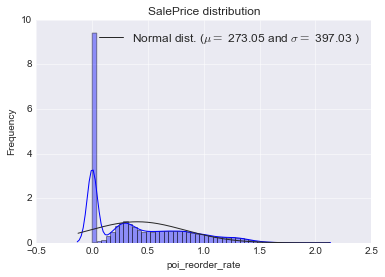

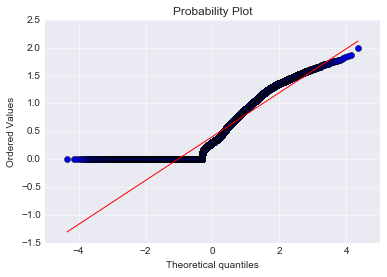

In [269]:
import math

train = ueq_10wan_train
train = train.fillna(0)
print len(train["poi_reorder_counts"])
train['delivery_duration_rs'] = train["poi_reorder_counts"]
# out = train["poi_reorder_rate"]
sns.distplot(out , fit=norm)

#Check the new distribution 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['delivery_duration_rs'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(out, plot=plt)
plt.show()

In [252]:
# train[train["poi_reorder_counts"] ==0].head(100)
train[train.poi_id==885559].head(100)

,id,uuid,wm_poi_id,poi_id,city_id,shipping_fee,order_time,user_id,total,original_price,is_donation,is_discount_fee,longitude,latitude,wk,mo,reorder,poi_reorder_rate,poi_reorder_counts,poi_one_bought,poi_two_bought,user_reorder_rate,user_reorder_count,comment_1star,comment_2star,comment_3star,comment_4star,comment_5star,pos_delivery_comment_rate,neg_delivery_comment_rate,pos_comment_rate,neg_comment_rate,comment_5star_rate,food_comment_cnt,avg_comment_score,avg_delivery_comment_score,avg_food_comment_score,original_price_3day,original_price_7day,original_price_14day,order_cnt_increase,pic_comment_cnt,food_comment_rate,pic_comment_rate,dp_avg_price,dp_score,discount_rate_new_customer_7day,discount_rate_all_customer_7day,dt
4837,6133927518,AFB43CB5ADFE3F796BAC29FC69DA5E21FC200AB33F28ED...,885559,885559,130500,3.0,1505788987,826957823,23.0,23.0,0,0,114499738,37059053,105279,24213,0,0.208,26.0,98.0,24.0,0.285714,2,1.0,3.0,7.0,6.0,50.0,0.970149,0.014925,0.835821,0.059701,0.746269,67.0,4.507463,4.895523,4.507463,656.800009,1663.200018,3748.800041,-14.0,2.0,0.206154,0.006154,10.0,71.0,0.952381,0.986507,20170919


In [254]:
train = ueq_10wan_train

print len(train[train["poi_reorder_rate"]>0])
print len(train[train["poi_reorder_rate"]==0.0])
print len(train[train["poi_reorder_counts"]>0])
print len(train[train["poi_reorder_counts"]==0.0])

print len(ueq_out[ueq_out["poi_reorder_rate"]>0])
print len(ueq_out[ueq_out["poi_reorder_rate"]==0.0])

496009
3991
496009
3991
62482
295


In [190]:
train["user_reorder_rate"] = train["user_reorder_rate"].apply(lambda x:0 if x < 0 else x)


 mu = 2703.38 and sigma = 1393.15



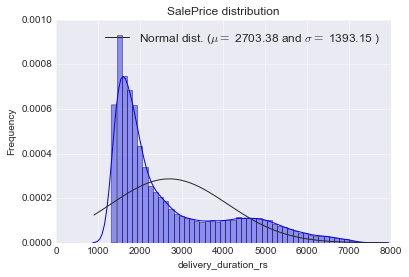

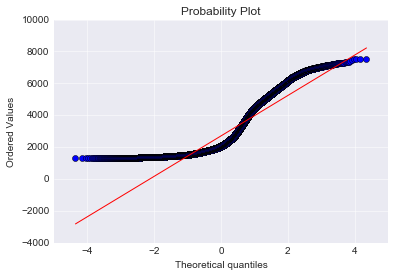

In [13]:
import math

train = ueq_out
train["delivery_duration_rs"] = train["prd_bin"]
sns.distplot(train['delivery_duration_rs'] , fit=norm)

#Check the new distribution 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['delivery_duration_rs'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['delivery_duration_rs'], plot=plt)
plt.show()

In [95]:
import numpy as np
# ueq_10wan.groupby("prd_bin").agg({"uuid":"nunique","Unnamed: 0":"count"})
rs = ueq_10wan.groupby("uuid").agg({"uuid":{"rs":"count"}}).reset_index()
# ueq_10wan[ueq_10wan.prd_bin==4305].head(100)
ueq_10wan.columns = [['uuid',"rs"]]

rs.columns

ValueError: Length mismatch: Expected axis has 27 elements, new values have 2 elements

In [94]:
ueq_prd['af_exp'] = ueq_prd['experiencescore'].apply(lambda x:map(lambda x:x,x.split(";")[:-1]))

NameError: name 'ueq_prd' is not defined

In [5]:
ueq_prd['ratio_exp'] = ueq_prd['af_exp'].apply(lambda x:sum([1 for r in x if safe_float(r) != 0.02441959349671682])/len(x))

In [6]:
ueq_prd.groupby(["cvr_pv_exp_id"]).agg({"ratio_exp":"mean"})

,ratio_exp
cvr_pv_exp_id,
1801,0.770294
1802,0.771542
1803,1.000000


In [53]:
ueq_prd['rs_exp'] = ueq_prd['af_exp'].apply(lambda x:np.mean([safe_float(r)  for r in x if safe_float(r) > 0.03]))

/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [54]:
ueq_prd.groupby(["cvr_pv_exp_id"]).agg({"rs_exp":"mean"})

,rs_exp
cvr_pv_exp_id,
1801,0.477553
1802,0.477129
1803,4.833292


In [218]:
ueq_10wan["user_reorder_rate_encode"] =  ueq_10wan["user_reorder_rate"].apply(lambda x:1 if x>0 else 0)
ueq_10wan["user_reorder_count_encode"] =  ueq_10wan["user_reorder_count"].apply(lambda x:1 if x>0 else 0)

person = ueq_10wan.corr()
person[["reorder"]].head(100)

,reorder
Unnamed: 0,-0.001101
id,0.007010
wm_poi_id,-0.030916
poi_id,-0.030916
city_id,0.002990
shipping_fee,-0.093628
order_time,0.012032
user_id,0.014136
total,-0.094910
original_price,-0.089867


In [69]:
reorder_exp_by_day[reorder_exp_by_day.cvr_pv_exp_id==1802][['_c1']]

,_c1
14,0.433811
15,0.405317
16,0.399959
17,0.378046
18,0.347830
19,0.323288
20,0.336105
21,0.315384
22,0.288562
23,0.253613


In [70]:
rs.head()

,_c1,1802,1803
0,0.431471,NaN,NaN
1,0.407831,NaN,NaN
2,0.393366,NaN,NaN
3,0.379340,NaN,NaN
4,0.343653,NaN,NaN
